In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
data_frame=pd.read_csv('../data/Forest_Fires_Dataset_Cleaned.csv')
data_frame.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## For our prediction task using Linear Regression model, we have used the FWI as our Target class.

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [6]:
data_frame.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [7]:
data_frame.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
data_frame.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
data_frame['Classes'].value_counts()

In [10]:
# Independent and Dependent Features
X=data_frame.drop('FWI', axis=1) #Independent features
y=data_frame['FWI'] #Dependent features
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
X.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [ ]:
y.head()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Feature Selection

In [11]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

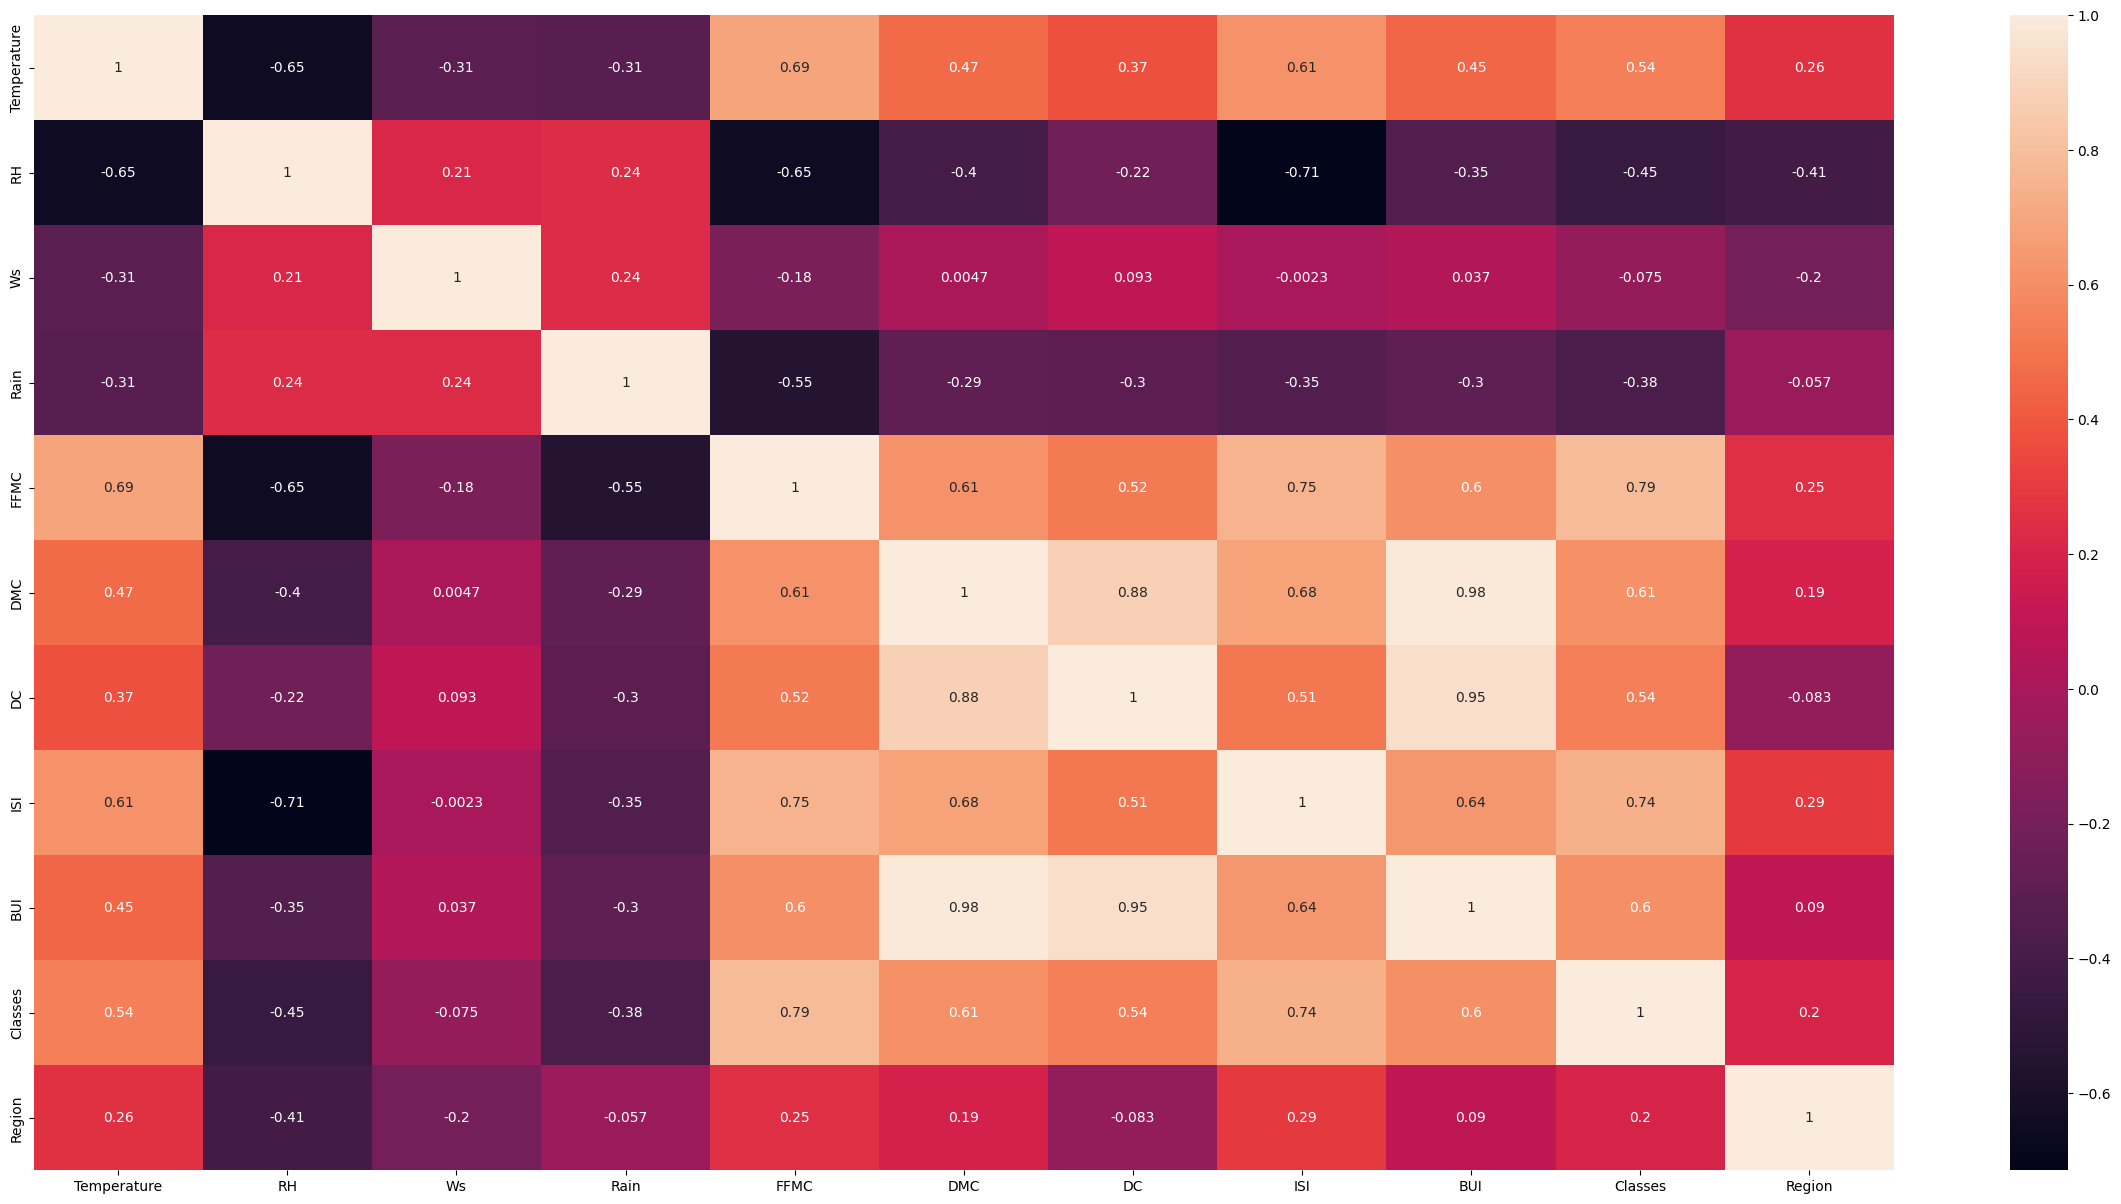

In [12]:
plt.figure(figsize=(30,15))
sns.heatmap(X_train.corr(), annot=True)

#### Multicolinearity

In [13]:
def correlation(df, threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(X_train,0.85)
corr_features

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

In [16]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [17]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled

/var/folders/mk/5l02p9bd68z1bcn783n8hzd00000gn/T/ipykernel_86344/2846354994.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
/var/folders/mk/5l02p9bd68z1bcn783n8hzd00000gn/T/ipykernel_86344/2846354994.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


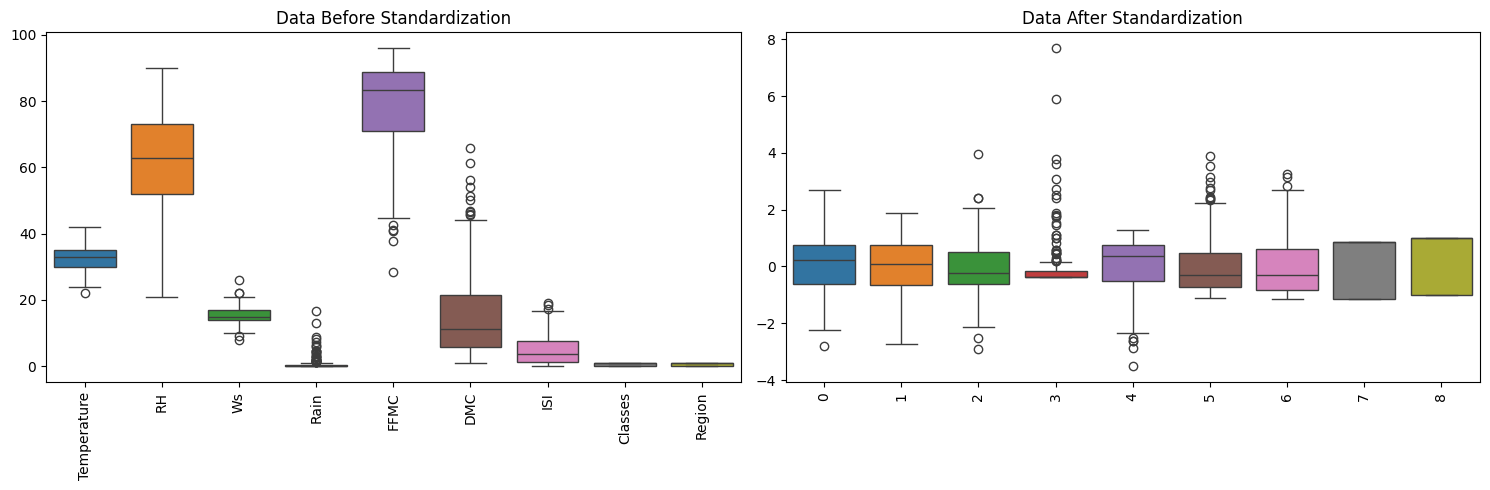

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot before standardization
sns.boxplot(data=X_train, ax=axes[0])
axes[0].set_title("Data Before Standardization")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Boxplot after standardization
sns.boxplot(data=X_train_scaled, ax=axes[1])
axes[1].set_title("Data After Standardization")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linearReg = LinearRegression()

In [21]:
linearReg.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred=linearReg.predict(X_test_scaled)
print('Mean Absolute error: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Absolute error:  0.5049978694165687
R2 Score:  0.9805895859259882


In [ ]:
plt.scatter(y_test,y_pred)

# Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

In [25]:
lasso=Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [26]:
y_pred=lasso.predict(X_test_scaled)
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
print('R2 Score: ', r2_score(y_test,y_pred))

Mean Absolute Error:  1.0093958923873407
R2 Score:  0.9430507350726562


In [ ]:
plt.scatter(y_test,y_pred)

## Cross Validation

In [28]:
from sklearn.linear_model import LassoCV
lassoCv=LassoCV(cv=5)

In [29]:
lassoCv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [ ]:
lassoCv.alpha_

In [ ]:
lassoCv.alphas_

In [ ]:
lassoCv.mse_path_

In [ ]:
y_pred=lassoCv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

In [34]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("R2 Score: ",r2_score(y_test, y_pred))

Mean Absolute Error:  0.5556715031617869
R2 Score:  0.978328234520343


# Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [36]:
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

In [ ]:
plt.scatter(y_test,y_pred)

In [38]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
print('R2 Score: ', r2_score(y_test,y_pred))

Mean Absolute Error:  0.51920483258448
R2 Score:  0.9801058063273599


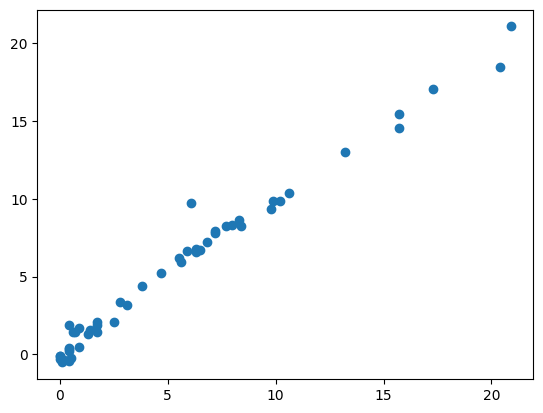

In [39]:
from sklearn.linear_model import RidgeCV
ridgeCv=RidgeCV(cv=10)
ridgeCv.fit(X_train_scaled,y_train)
y_pred=ridgeCv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

In [40]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
print('R2 Score: ', r2_score(y_test,y_pred))

Mean Absolute Error:  0.51920483258448
R2 Score:  0.9801058063273599


# ElasticNet Regression

Mean Absolute Error:  0.5192048325823364
R2 Score:  0.9801058063273912


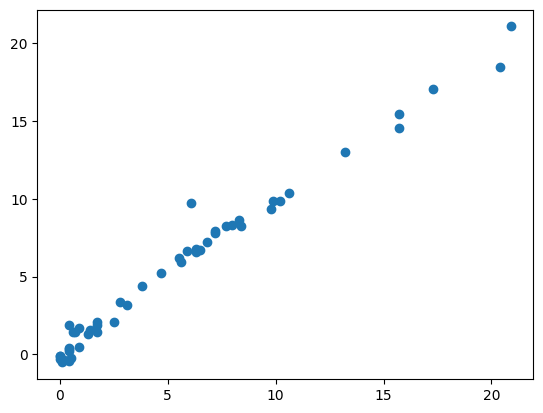

In [41]:
from sklearn.linear_model import ElasticNet
ridgeCv=RidgeCV()
ridgeCv.fit(X_train_scaled,y_train)
y_pred=ridgeCv.predict(X_test_scaled)
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
print('R2 Score: ', r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

Mean Absolute Error:  0.51920483258448
R2 Score:  0.9801058063273599


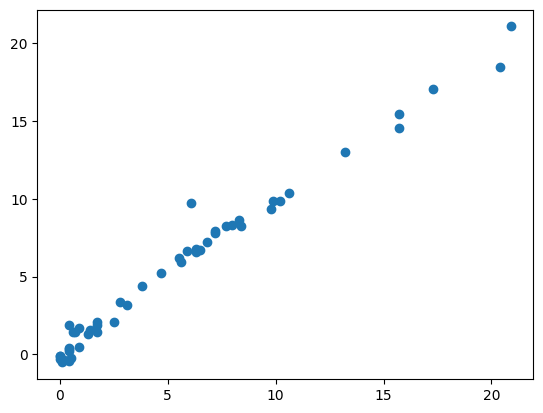

In [42]:
from sklearn.linear_model import ElasticNetCV
ridgeCv=RidgeCV(cv=10)
ridgeCv.fit(X_train_scaled,y_train)
y_pred=ridgeCv.predict(X_test_scaled)
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
print('R2 Score: ', r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

##### Pickling the trained ridge regression model, and scaler standardization for further prediction application

In [43]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))